test feature size 6480
Test Data Accuracy: 0.63
Model saved as TrainedKNNMODEL.pkl


<Figure size 640x480 with 0 Axes>

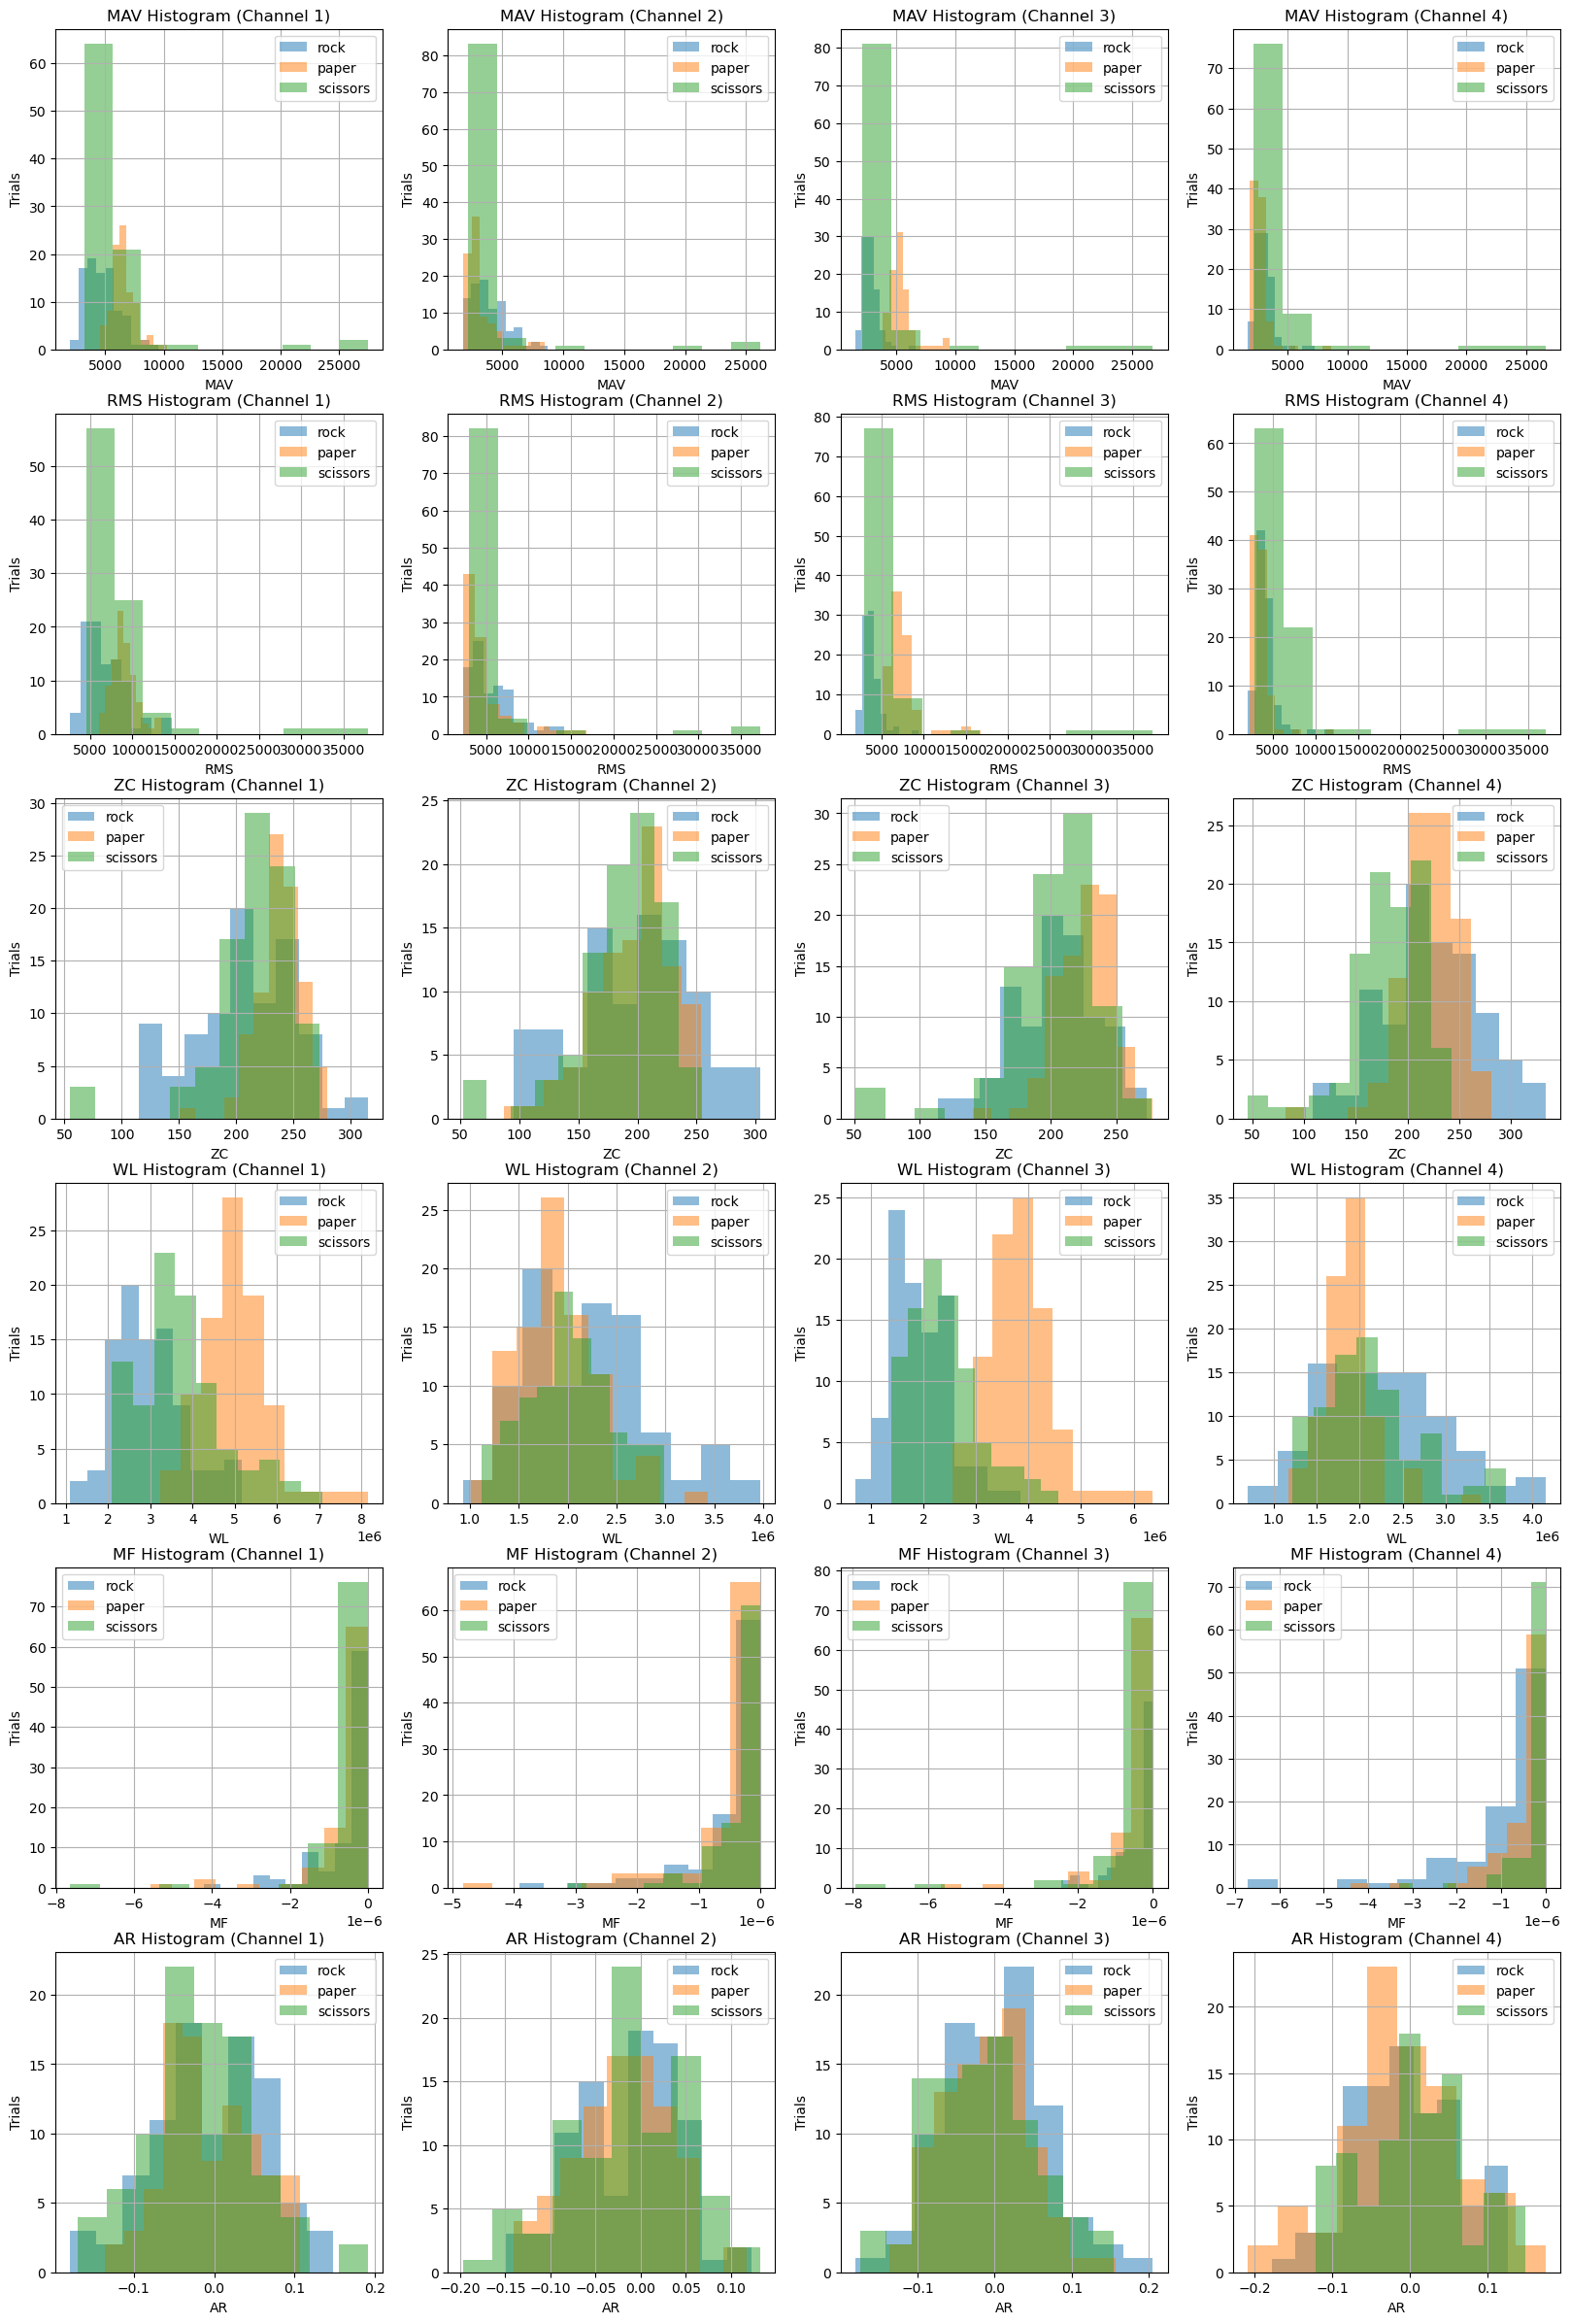

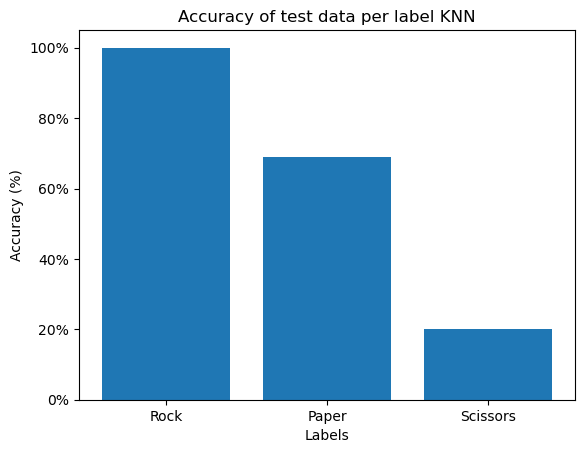

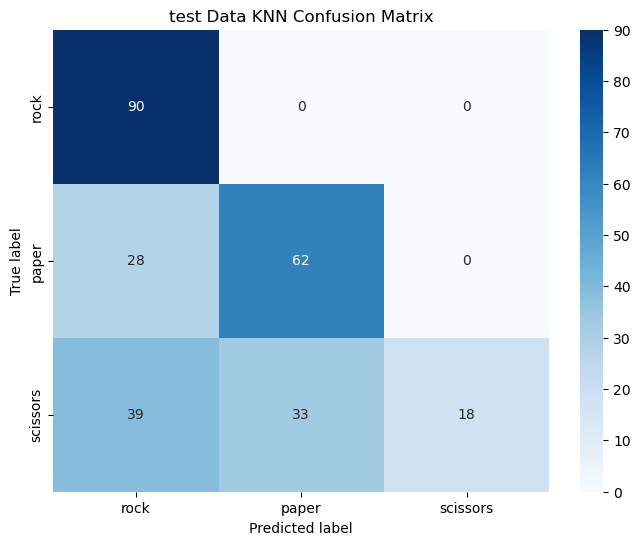

In [1]:
import numpy as np
import matplotlib.pyplot as plt #imported for plotting
import scipy.io #used for computing values
import pickle #importing to save
import Features # I created this list of 7 chosen features
import Functions # holds various functions I mde to be used here
from sklearn.metrics import accuracy_score # using to get accuracy of data
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

#####################################################
# loading data
Tester = scipy.io.loadmat("DataFile/allSubjFiles.mat")
TestData = Tester['dataChTimeTr']

#####################################################
#Extracting Features from Data
#to import chosen features I have made a file called Features

rps_labels = np.array(["rock", "paper", "scissors"])

test_processed = {
  "features": Features.extract_features(TestData),
  # flatten labels to get them to work in python
  # Since matlab indexes at 1 for some reason I subtract 1
  "labels": Tester["labels"].flatten() - 1,
  "label_names": rps_labels
}
#####################################################
knn_model = KNeighborsClassifier(n_neighbors=2)

test_features_dict = test_processed["features"] 

# Assuming each entry in the dictionary is a NumPy array and we need them stacked
#stacking them horizontally is the only way for the code to work without error
test_features_list = [value for key, value in test_features_dict.items()]
test_features_stacked = np.hstack(test_features_list)  # This stacks arrays horizontally

# Prepare features test data 
print("test feature size",test_features_stacked.size)


reshaped_test_features = test_features_stacked.reshape(len(test_processed["labels"]), -1)


#reshaped_test_features = test_features_stacked.reshape(120, -1)  # Adjust the shape according to data

test_features_array = reshaped_test_features

knn_model.fit(test_features_array, test_processed["labels"])


# Predict labels for the test set
y_pred_test = knn_model.predict(test_features_array)

# Calculate the accuracy for test data
testing_accuracy = accuracy_score(test_processed["labels"], y_pred_test)
print(f"Test Data Accuracy: {testing_accuracy:.2f}")

#####################################################
# Save the trained KNN model to a .pkl file
model_filename = "TrainedKNNMODEL.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(knn_model, file)

print(f"Model saved as {model_filename}")
#####################################################
#Plotting Data
#Histogram plots of test Data

# number labels (0, 1, 2)
test_labels_num = test_processed["labels"]
# string labels ("rock", "paper", "scissors")
test_labels = test_processed["label_names"][test_labels_num]

plt.clf()

features = list(test_processed["features"].keys())

# rows = features, columns = channels
fig, axs = plt.subplots(len(features), 4, figsize=(4*5, len(features)*5))

for feature_name, feature_data in test_processed["features"].items():
  for channel in range(feature_data.shape[0]):
    ax = axs[features.index(feature_name), channel]
    for label in rps_labels:
      histogram_data = feature_data[channel, test_labels == label]
      ax.hist(histogram_data, alpha=0.5, label=label)
      ax.set_title(f"{feature_name.upper()} Histogram (Channel {channel + 1})")
      ax.set_xlabel(feature_name.upper())
      ax.set_ylabel("Trials")
      ax.grid(True)
      ax.legend()

plt.show()


#####################################################
#graph accuracy of each label
# Assume y_true and y_pred are true labels and predicted labels respectively
y_true = test_processed["labels"]
y_pred = knn_model.predict(test_features_array)

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy for each label (mutiplied by 100 to get percentages)
label_accuracies = 100* cm.diagonal() / cm.sum(axis=1)

# setting up labels
labels = ["Rock", "Paper", "Scissors"]

# Plotting
plt.bar(labels, label_accuracies)
plt.xlabel('Labels')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of test data per label KNN')
plt.xticks(labels)  # Set x-ticks to be the labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
#formatting to show percentages
plt.show()

#####################################################
#confusion matrix code section for Test Data
#y_true and y_pred are true labels and predicted labels respectively
y_true = test_processed["labels"]
y_pred = knn_model.predict(test_features_array)

# Getting confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom labels for classes
labels = ["rock", "paper", "scissors"]

# Creating a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plotting using seaborn for a more aesthetically pleasing heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('test Data KNN Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


